<a href="https://colab.research.google.com/github/kdanu/Data-Science-Project/blob/main/skripsi_background_hijau_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
os.listdir('/content/drive/MyDrive/dataset_skripsi_resize_1')

In [ ]:
da= ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z']
for i in da:
  print(f'total gambar bisindo {i}:', len(os.listdir(f'/content/drive/MyDrive/dataset_skripsi_resize_1/{i}')))

total gambar bisindo A: 100
total gambar bisindo B: 100
total gambar bisindo C: 100
total gambar bisindo D: 100
total gambar bisindo E: 100
total gambar bisindo F: 100
total gambar bisindo G: 100
total gambar bisindo H: 100
total gambar bisindo I: 100
total gambar bisindo J: 100
total gambar bisindo K: 100
total gambar bisindo L: 100
total gambar bisindo M: 100
total gambar bisindo N: 100
total gambar bisindo O: 100
total gambar bisindo P: 100
total gambar bisindo Q: 100
total gambar bisindo R: 100
total gambar bisindo S: 100
total gambar bisindo T: 100
total gambar bisindo U: 100
total gambar bisindo V: 100
total gambar bisindo W: 100
total gambar bisindo X: 100
total gambar bisindo Y: 100
total gambar bisindo Z: 100


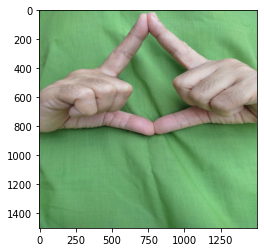

In [ ]:
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mping
%matplotlib inline
img = image.load_img('/content/drive/MyDrive/dataset_skripsi_resize_1/A/IMG_20220305_100346.jpg')
imgplot= plt.imshow(img)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir= os.path.join("/content/drive/MyDrive/dataset_skripsi_resize_1")
train_datagen=  ImageDataGenerator(rescale=1./255,
                                  rotation_range=20,
                                  zoom_range= 0.2,
                                  shear_range=0.2,
                                  fill_mode= "nearest",
                                  validation_split=0.2)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=8,
    class_mode='categorical',
    subset='training')
validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=16,
    class_mode='categorical',
    subset='validation')

Found 2080 images belonging to 26 classes.
Found 520 images belonging to 26 classes.


In [ ]:
import tensorflow as tf
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(1500,150,3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(512, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(26, activation='softmax')
])

In [ ]:
opt = tf.keras.optimizers.SGD(learning_rate=0.001)
model.compile(optimizer=opt,
              loss='categorical_crossentropy',
              metrics = ['accuracy'])

In [ ]:
import time
start_time = time.time()
history = model.fit(train_generator,
                              validation_data=validation_generator,
                              epochs=50,
                              verbose=2)
print("Running time : --- %s seconds ---" % (time.time() - start_time))

Epoch 1/50
260/260 - 677s - loss: 3.2483 - accuracy: 0.0481 - val_loss: 3.2381 - val_accuracy: 0.0385 - 677s/epoch - 3s/step
Epoch 2/50
260/260 - 100s - loss: 3.2248 - accuracy: 0.0947 - val_loss: 3.2120 - val_accuracy: 0.0788 - 100s/epoch - 384ms/step
Epoch 3/50
260/260 - 100s - loss: 3.1767 - accuracy: 0.1337 - val_loss: 3.1385 - val_accuracy: 0.1462 - 100s/epoch - 384ms/step
Epoch 4/50
260/260 - 100s - loss: 3.0284 - accuracy: 0.1798 - val_loss: 2.8853 - val_accuracy: 0.2462 - 100s/epoch - 384ms/step
Epoch 5/50
260/260 - 101s - loss: 2.5420 - accuracy: 0.2904 - val_loss: 2.2242 - val_accuracy: 0.4115 - 101s/epoch - 389ms/step
Epoch 6/50
260/260 - 101s - loss: 1.7724 - accuracy: 0.4817 - val_loss: 1.6341 - val_accuracy: 0.5212 - 101s/epoch - 388ms/step
Epoch 7/50
260/260 - 100s - loss: 1.2744 - accuracy: 0.6212 - val_loss: 1.3958 - val_accuracy: 0.6077 - 100s/epoch - 386ms/step
Epoch 8/50
260/260 - 103s - loss: 0.9825 - accuracy: 0.6986 - val_loss: 1.1914 - val_accuracy: 0.6231 - 103

In [ ]:
model.save("skripsiterbaru.h5")

In [ ]:
train_loss, train_acc= model.evaluate_generator(train_generator)
validation_loss,validation_acc= model.evaluate_generator(validation_generator)
print("Train: %.3f, Test: %.3f" % (train_acc,validation_acc))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  


Train: 0.983, Test: 0.823


In [ ]:
print("Train: %.3f, Test: %.3f" % (train_loss,validation_loss))

Train: 0.057, Test: 0.766


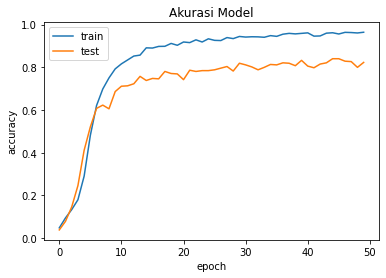

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Akurasi Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

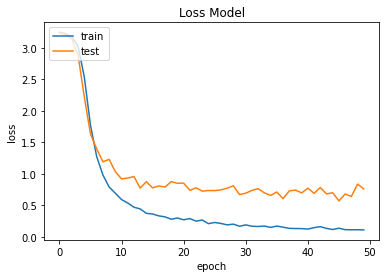

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

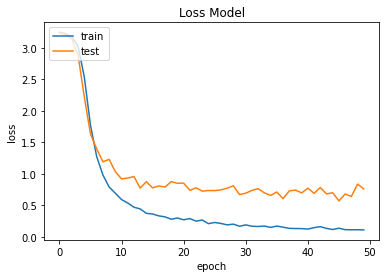

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 128)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 512)       590336    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 512)      0

Saving IMG_20220305_102722.jpg to IMG_20220305_102722.jpg
Saving IMG_20220305_102726.jpg to IMG_20220305_102726 (2).jpg
Saving IMG_20220305_102757.jpg to IMG_20220305_102757 (1).jpg
Saving IMG_20220305_102822.jpg to IMG_20220305_102822 (1).jpg
Saving IMG_20220305_102823.jpg to IMG_20220305_102823 (1).jpg
Saving IMG_20220305_102824.jpg to IMG_20220305_102824 (1).jpg
Saving IMG_20220306_111145.jpg to IMG_20220306_111145 (1).jpg
Saving IMG_20220306_111150.jpg to IMG_20220306_111150.jpg
Saving IMG_20220306_111210.jpg to IMG_20220306_111210.jpg
Saving IMG_20220306_111213.jpg to IMG_20220306_111213.jpg
IMG_20220305_102722.jpg
K
IMG_20220305_102726.jpg
K
IMG_20220305_102757.jpg
K
IMG_20220305_102822.jpg
K
IMG_20220305_102823.jpg
K
IMG_20220305_102824.jpg
K
IMG_20220306_111145.jpg
K
IMG_20220306_111150.jpg
K
IMG_20220306_111210.jpg
K
IMG_20220306_111213.jpg
K


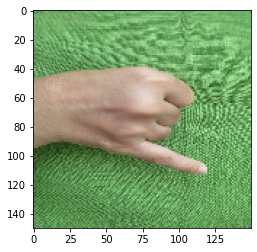

In [ ]:
import numpy as np
from google.colab import files
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():

  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))

  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])

  classes = model.predict(images, batch_size=10)
  output_class = np.argmax(classes)
  print(fn)
  if output_class==0:
   print('A')
  elif output_class==1:
   print('B')
  elif output_class==2:
   print('C')
  elif output_class==3:
   print('D')
  elif output_class==4:
   print('E')
  elif output_class==5:
   print('F')
  elif output_class==6:
   print('G')
  elif output_class==7:
   print('H')
  elif output_class==8:
   print('I')
  elif output_class==9:
   print('J')
  elif output_class==10:
   print('K')
  elif output_class==11:
   print('L')
  elif output_class==12:
   print('M')
  elif output_class==13:
   print('N')
  elif output_class==14:
   print('O')
  elif output_class==15:
   print('P')
  elif output_class==16:
   print('Q')
  elif output_class==17:
   print('R')
  elif output_class==18:
   print('S')
  elif output_class==19:
   print('T')
  elif output_class==20:
   print('U')
  elif output_class==21:
   print('V')
  elif output_class==22:
   print('W')
  elif output_class==23:
   print('X')
  elif output_class==24:
   print('Y')
  else:
   print('z')

In [ ]:
print(train_generator.class_indices)

{'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'H': 7, 'I': 8, 'J': 9, 'K': 10, 'L': 11, 'M': 12, 'N': 13, 'O': 14, 'P': 15, 'Q': 16, 'R': 17, 'S': 18, 'T': 19, 'U': 20, 'V': 21, 'W': 22, 'X': 23, 'Y': 24, 'Z': 25}
